In [42]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

In [2]:
train = pd.read_csv("fashionmnist/train.csv")
test = pd.read_csv("fashionmnist/test.csv")

print(train.shape, test.shape)   

(60000, 786) (10000, 785)


In [4]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

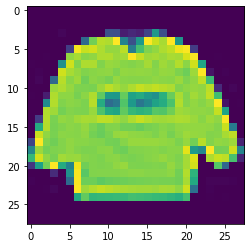

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [10]:
y_train = train.loc[:, 'label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [11]:
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [12]:
target_values = {0 : 'T-shirt/top', 
                 1 : 'Trouser', 
                 2: 'Pullover', 
                 3: 'Dress', 
                 4: 'Coat', 
                 5: 'Sandal', 
                 6: 'Shirt', 
                 7: 'Sneaker', 
                 8: 'Bag', 
                 9: 'Ankle boot'}

In [13]:
y_train[0]

2

In [14]:
target_values[2]

'Pullover'

In [15]:
target_values[y_train[0]]

'Pullover'

In [16]:
# plt.imshow(train_images[0])

In [ ]:
# 테스트 데이터 499번 인덱스는 무엇일까요? 그림으로 프린트!

In [17]:
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

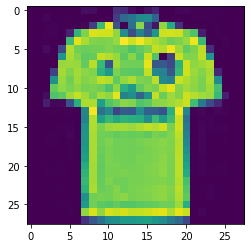

In [18]:
plt.imshow(test_images[0])

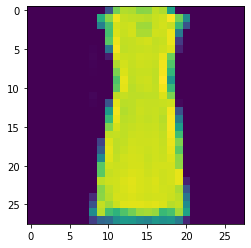

In [19]:
plt.imshow(test_images[499])

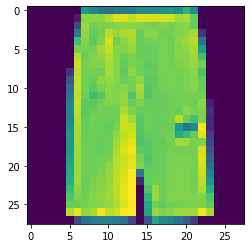

In [20]:
plt.imshow(test_images[9999])

In [ ]:
## 전처리 ##

In [22]:
## 스케일링 0~255
X_train = train_images / 255
X_test = test_images / 255

print("최소값:", X_train[0].min())
print("최대값:", X_train[0].max())

최소값: 0.0
최대값: 1.0


In [23]:
# 채널 차원 추가(3차원--->4차원으로!)
print("변환 전:", X_train.shape, X_test.shape)

변환 전: (60000, 28, 28) (10000, 28, 28)


In [24]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [25]:
print("변환 후:", X_train.shape, X_test.shape)

변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [26]:
# Train - Validation 데이터 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, 
                                             stratify=y_train, 
                                             shuffle=True, random_state=SEED)
print("학습 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

학습 데이터셋 크기:  (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기:  (12000, 28, 28, 1) (12000,)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [29]:
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28, 28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))
#model.add(Dropout(rate=0.5))
mlp_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
mlp_lhistory = mlp_model.fit(X_tr, y_tr, 
                             batch_size=64, 
                             epochs=20,
                             validation_data=(X_val, y_val),
                             verbose=2)

Epoch 1/20
750/750 - 1s - loss: 0.5740 - acc: 0.8021 - val_loss: 0.4500 - val_acc: 0.8425 - 1s/epoch - 2ms/step
Epoch 2/20
750/750 - 1s - loss: 0.4221 - acc: 0.8501 - val_loss: 0.4063 - val_acc: 0.8595 - 764ms/epoch - 1ms/step
Epoch 3/20
750/750 - 1s - loss: 0.3869 - acc: 0.8628 - val_loss: 0.4007 - val_acc: 0.8598 - 794ms/epoch - 1ms/step
Epoch 4/20
750/750 - 1s - loss: 0.3632 - acc: 0.8702 - val_loss: 0.3955 - val_acc: 0.8579 - 855ms/epoch - 1ms/step
Epoch 5/20
750/750 - 1s - loss: 0.3462 - acc: 0.8753 - val_loss: 0.3768 - val_acc: 0.8692 - 793ms/epoch - 1ms/step
Epoch 6/20
750/750 - 1s - loss: 0.3294 - acc: 0.8804 - val_loss: 0.3521 - val_acc: 0.8761 - 667ms/epoch - 889us/step
Epoch 7/20
750/750 - 1s - loss: 0.3171 - acc: 0.8843 - val_loss: 0.3478 - val_acc: 0.8797 - 657ms/epoch - 876us/step
Epoch 8/20
750/750 - 1s - loss: 0.3049 - acc: 0.8899 - val_loss: 0.3543 - val_acc: 0.8722 - 644ms/epoch - 859us/step
Epoch 9/20
750/750 - 1s - loss: 0.2955 - acc: 0.8923 - val_loss: 0.3428 - val

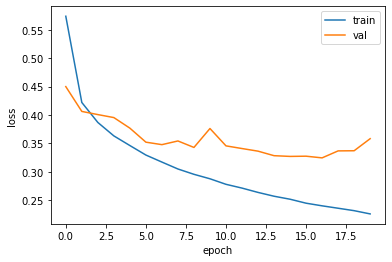

In [31]:
plt.plot(mlp_lhistory.history['loss'])
plt.plot(mlp_lhistory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

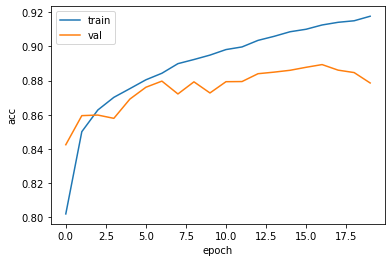

In [33]:
plt.plot(mlp_lhistory.history['acc'])
plt.plot(mlp_lhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [35]:
mlp_model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3583 - acc: 0.8786


[0.3582802712917328, 0.8785833120346069]

In [77]:
from tensorflow.keras.layers import Dropout
mlp2_model = Sequential()
mlp2_model.add(Flatten(input_shape=[28, 28]))
mlp2_model.add(Dense(units=64, activation='relu'))
mlp2_model.add(Dropout(rate=0.5))
mlp2_model.add(Dense(units=10, activation='softmax'))

mlp2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
mlp2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [78]:
# call-back 2개 지정: 1) 조기 종료, 최적의 가중치 저장
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best-mlp2-model.h5')

mlp2_history = mlp2_model.fit(X_tr, y_tr, 
                             batch_size=64, 
                             epochs=20,
                             validation_data=(X_val, y_val),
                             callbacks = [ checkpoint, early_stopping],
                             verbose=2)

Epoch 1/20
750/750 - 1s - loss: 0.7987 - acc: 0.7193 - val_loss: 0.4920 - val_acc: 0.8288 - 1s/epoch - 1ms/step
Epoch 2/20
750/750 - 1s - loss: 0.5785 - acc: 0.7976 - val_loss: 0.4355 - val_acc: 0.8444 - 693ms/epoch - 924us/step
Epoch 3/20
750/750 - 1s - loss: 0.5292 - acc: 0.8136 - val_loss: 0.4353 - val_acc: 0.8429 - 676ms/epoch - 901us/step
Epoch 4/20
750/750 - 1s - loss: 0.5089 - acc: 0.8193 - val_loss: 0.4072 - val_acc: 0.8566 - 677ms/epoch - 902us/step
Epoch 5/20
750/750 - 1s - loss: 0.4897 - acc: 0.8233 - val_loss: 0.3971 - val_acc: 0.8607 - 672ms/epoch - 895us/step
Epoch 6/20
750/750 - 1s - loss: 0.4759 - acc: 0.8294 - val_loss: 0.4004 - val_acc: 0.8549 - 683ms/epoch - 911us/step
Epoch 7/20
750/750 - 1s - loss: 0.4679 - acc: 0.8328 - val_loss: 0.3863 - val_acc: 0.8635 - 669ms/epoch - 892us/step
Epoch 8/20
750/750 - 1s - loss: 0.4614 - acc: 0.8331 - val_loss: 0.3780 - val_acc: 0.8648 - 672ms/epoch - 896us/step
Epoch 9/20
750/750 - 1s - loss: 0.4535 - acc: 0.8356 - val_loss: 0.37

In [79]:
mlp2_model.evaluate(X_val, y_val)

375/375 [==============================] - 0s 1ms/step - loss: 0.3725 - acc: 0.8723


[0.3725275993347168, 0.8722500205039978]

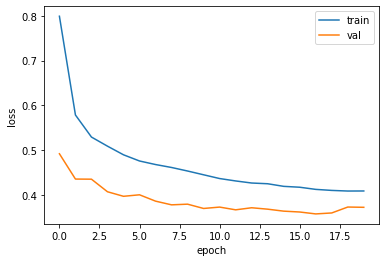

In [80]:
plt.plot(mlp2_history.history['loss'])
plt.plot(mlp2_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

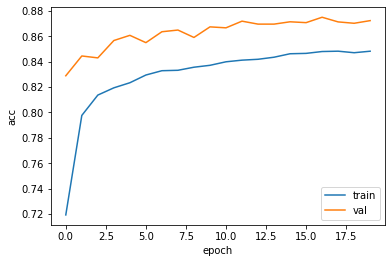

In [81]:
plt.plot(mlp2_history.history['acc'])
plt.plot(mlp2_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
################################

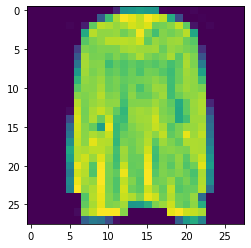

In [61]:
plt.imshow(X_val[0].reshape(28,28))

In [70]:
from tensorflow.keras.models import load_model
best_model = load_model('best-mlp2-model.h5')
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [72]:
y_pred_proba = best_model.predict(X_val[0:1])

In [73]:
y_pred_proba

array([[0.0000000e+00, 3.2420546e-25, 4.4261874e-09, 1.5054708e-18,
        1.0000000e+00, 0.0000000e+00, 2.9068846e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [74]:
np.argmax(y_pred_proba)

4

In [75]:
target_values[4]

'Coat'

In [ ]:
#####################################

In [83]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
## 전처리(필터를 거쳐서 특성을 부여한 것을 모은 다음, 요약한다.)
cnn_model.add(Conv2D(filters=16, 
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=[28,28,1]
                     ))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


## 딥러닝을 시작
# 1차원 데이타로 입력층
#  hidden layer로 층을 쌓고,
#  classification하는 출력층
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                173120    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [89]:
# call-back 2개 지정: 1) 조기 종료, 최적의 가중치 저장
early_stopping2 = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)
checkpoint2 = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

cnn_history = cnn_model.fit(X_tr, y_tr, 
                             batch_size=64, 
                             epochs=20,
                             validation_data=(X_val, y_val),
                             callbacks = [ checkpoint2, early_stopping2],
                             verbose=2)

Epoch 1/20
750/750 - 5s - loss: 0.2196 - acc: 0.9170 - val_loss: 0.2686 - val_acc: 0.9087 - 5s/epoch - 7ms/step
Epoch 2/20
750/750 - 6s - loss: 0.2096 - acc: 0.9191 - val_loss: 0.2665 - val_acc: 0.9096 - 6s/epoch - 7ms/step
Epoch 3/20
750/750 - 5s - loss: 0.2090 - acc: 0.9207 - val_loss: 0.2668 - val_acc: 0.9091 - 5s/epoch - 7ms/step
Epoch 4/20
750/750 - 6s - loss: 0.2048 - acc: 0.9231 - val_loss: 0.2765 - val_acc: 0.9089 - 6s/epoch - 8ms/step
Epoch 5/20
750/750 - 5s - loss: 0.2015 - acc: 0.9241 - val_loss: 0.2780 - val_acc: 0.9086 - 5s/epoch - 6ms/step
Epoch 6/20
750/750 - 5s - loss: 0.1976 - acc: 0.9239 - val_loss: 0.2777 - val_acc: 0.9085 - 5s/epoch - 6ms/step
Epoch 7/20
750/750 - 6s - loss: 0.1961 - acc: 0.9258 - val_loss: 0.2727 - val_acc: 0.9120 - 6s/epoch - 8ms/step
Epoch 8/20
750/750 - 6s - loss: 0.1926 - acc: 0.9261 - val_loss: 0.2760 - val_acc: 0.9135 - 6s/epoch - 7ms/step
Epoch 9/20
750/750 - 5s - loss: 0.1880 - acc: 0.9272 - val_loss: 0.2840 - val_acc: 0.9103 - 5s/epoch - 7

In [90]:
cnn_model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.2665 - acc: 0.9096


[0.26647740602493286, 0.909583330154419]

In [91]:
best_model = load_model('best-cnn-model.h5')
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                173120    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

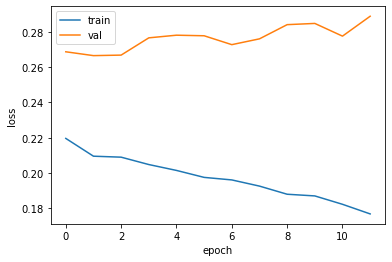

In [92]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

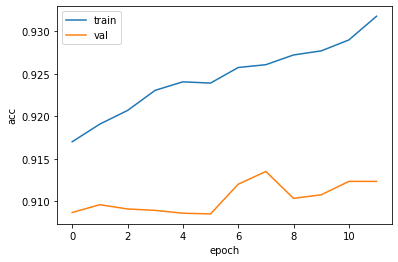

In [93]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [94]:
y_pred_proba = best_model.predict(X_val[0:1])

In [95]:
np.argmax(y_pred_proba)

4

In [96]:
target_values[4]

'Coat'